

# Project: Investigate a Dataset - [TMDb-Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. and we are going to analysis this dataset and try to answer the following questions .


### Question(s) for Analysis

#### Q1.How the runtime movies as changed over the years?

#### Q2. which month of a year has the highest number of movie released ? how the number of movie releases has changed over time? 

#### Q3.What are the top 10 movies that have high revenues?

#### Q4.What are the most popular genres of all times ?

In [4]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.set(color_codes= True)

# Data Wrangling



In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


from the dataset we can see there are irrelevant columns in that wont be helpful during the analysis such as **id*,imdb_id*,homepage*,cast* ,tagline*,budged_adj*,revenue_adj** 


### Data Cleaning
1- we **Drop** the irrelevant columns that wont be considered in our further analysis

In [6]:
df.drop(["id","imdb_id","homepage","tagline","budget_adj","revenue_adj","cast"],axis=1,inplace=True)

In [7]:
df.head()

,popularity,budget,revenue,original_title,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [8]:
#let`s check the number of columns and raws
df.shape

(10866, 14)

In [9]:
#check for duplicates 
df.duplicated().sum()

1

In [10]:
#drop the duplicates 
df.drop_duplicates(inplace=True)
df.duplicated().sum()


0

In [11]:
#check for null values 
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

It seems that the **cast** , **director** , and **production_companies** columns are having so many missing values we can`t just drop rows that also have numerical values,
here , the number of missing values wont affect our numerical analysis there is no need to drop anything 

In [12]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
director                10821 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (How the runtime movies as changed over the years?)

#### Now a days we feel that the movies we watch are getting longer , but we don'nt know wether it's geeting longer or we are just 
#### runing out of patience ?
#### Acorrding to the IMDb , the defination of a movie is when its "runtime" is 40 minutes . so , we filter-out movies of more than 40 minutes 

In [13]:
df= df[df["runtime"] > 40]

In [14]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10614.000000,1.061400e+04,1.061400e+04,10614.000000,10614.000000,10614.000000,10614.000000
mean,0.653276,1.496196e+07,4.076602e+07,104.199359,221.343980,5.959224,2001.221029
std,1.006692,3.119318e+07,1.182223e+08,28.456957,581.726544,0.930494,12.823511
min,0.000065,0.000000e+00,0.000000e+00,41.000000,10.000000,1.500000,1960.000000
25%,0.210580,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1994.000000
50%,0.386508,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2005.000000
75%,0.722110,1.600000e+07,2.559449e+07,112.000000,149.750000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


#### as we can see the runtime starts with 41 min 

In [15]:
def label (x,y,t):
    plt.xlabel(x,fontsize=15)
    plt.ylabel(y,fontsize=15)
    plt.title(t,fontsize=20)
    plt.show()

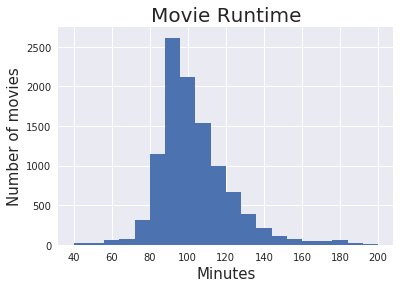

In [16]:
plt.hist(df["runtime"], range=(40,200), bins= 20)
label("Minutes","Number of movies","Movie Runtime")

#### We can see from the histogram that  most of the moves' runtime ranges between 90 to 110 minutes 

In [13]:
grouped_movies = df["runtime"].groupby(df["release_year"]).describe()

In [14]:
avg_runtime_by_year= grouped_movies["mean"]
avg_runtime_min= grouped_movies["mean"] - grouped_movies["std"]
avg_runtime_max= grouped_movies["mean"] + grouped_movies["std"]

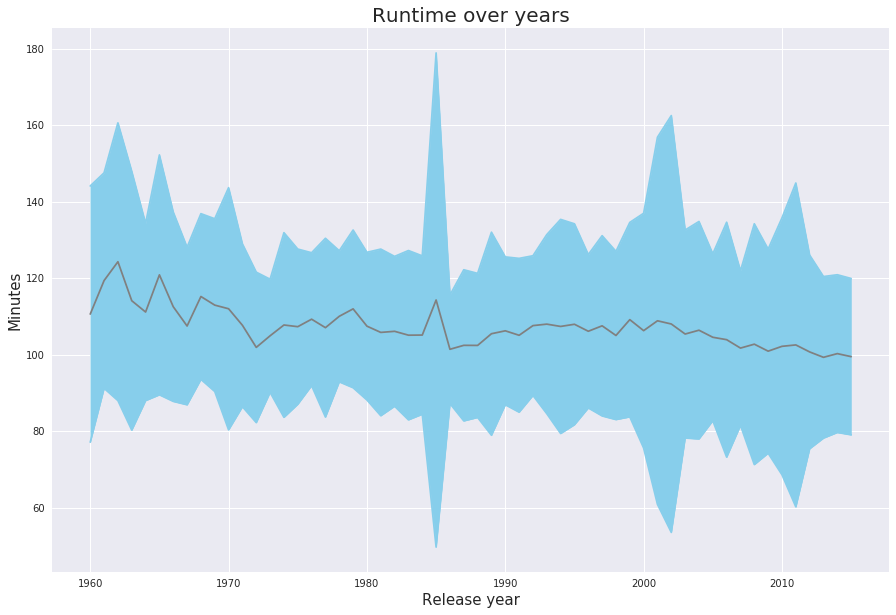

In [15]:
fig, x = plt.subplots(figsize=(15,10))

x.plot(avg_runtime_by_year , color="gray")
x.plot(avg_runtime_min,color= "skyblue")
x.plot(avg_runtime_max,color=  "skyblue")

x.fill_between(grouped_movies.index,avg_runtime_min,avg_runtime_max,color= "skyblue")

x.set_title("Runtime over years",fontsize= 20)
x.set_xlabel("Release year",fontsize= 15)
x.set_ylabel("Minutes",fontsize= 15)
plt.show()

In [18]:
movies_by_decades = df.copy()
movies_by_decades["release_year"]= ((movies_by_decades["release_year"]//10)*10).astype(int)


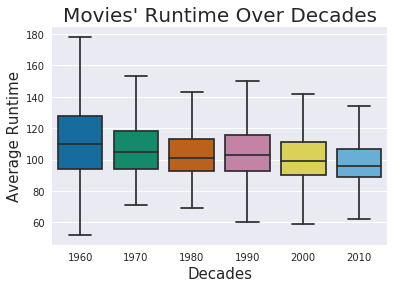

In [19]:
sns.boxplot(x= "release_year", y="runtime", data= movies_by_decades , palette ="colorblind",showfliers=False)
label("Decades","Average Runtime","Movies' Runtime Over Decades")


### From these plots we can tell that mid eighties movies have the longest runtime which is 180 minutes (3 hours) , the average runtime doesn'nt change much over the years though . which means that movies haven't become longer , we just get bored overtime and run out of patience.

### Research Question 2  (which  year has the highest number of movie released ? how the number of movie releases has changed over time?  )

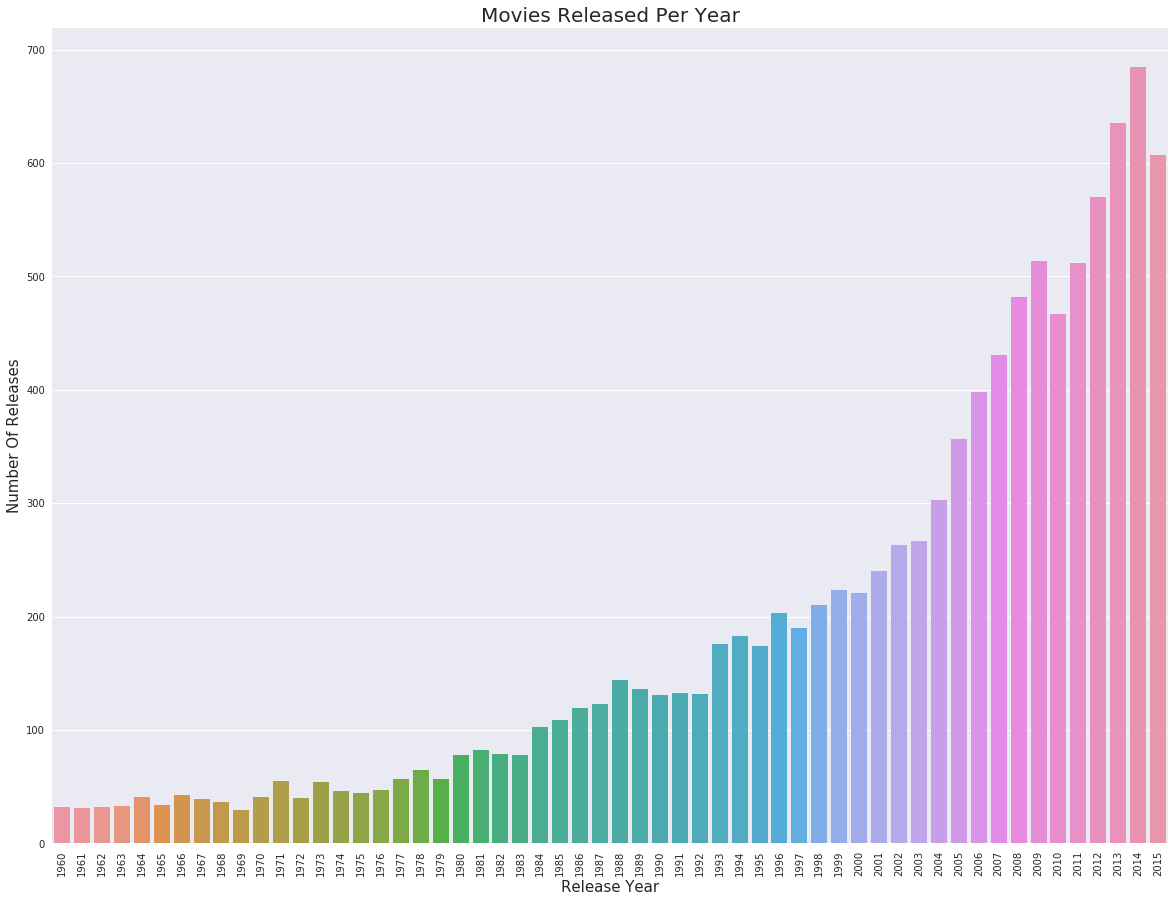

In [20]:
plt.figure(figsize=(20,15))
sns.countplot(df["release_year"])
plt.xticks(rotation=90)
label("Release Year","Number Of Releases","Movies Released Per Year")

### From this graph we can tell that 2014 has the highest number of movie releases throghout these years and also the number of movie releases has increased over time . 

In [19]:
number_of_movies = df["release_year"][df["release_year"]==2014].count()
print(f"The number of movies released in 2014 are {number_of_movies}")

The number of movies released in 2014 are 685


## Question3 (What are the top 10 movies that have high revenues?)

In [21]:
data=df[["original_title","revenue"]].sort_values("revenue",ascending=False).head(10)


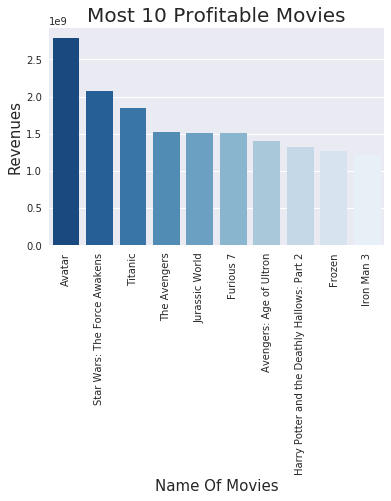

In [22]:
sns.barplot(x="original_title",y= "revenue",data=data,palette="Blues_r")
plt.xticks(rotation=90)
label("Name Of Movies","Revenues","Most 10 Profitable Movies")

## Question 4 (What are the most popular genres of all times ?)

In [24]:
data_genres=df["genres"].str.get_dummies(sep='|')


In [25]:
dg1=data_genres.sum().reset_index()

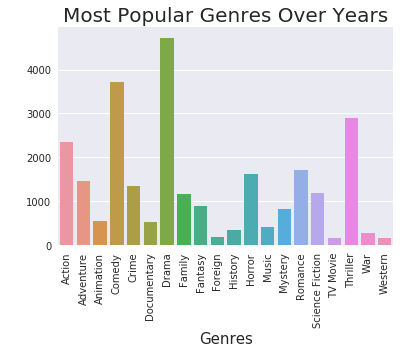

In [26]:
sns.barplot(x=data_genres.columns,y=data_genres.sum(),data=dg1)
plt.xticks(rotation=90)
label("Genres"," ","Most Popular Genres Over Years")

<a id='conclusions'></a>
## Conclusion

### Limitations 

**This data has alot of missing data in**

1- keywords 

2-production companies

3- directore names

**which have might affect the further analysis , that's why I personally took my analysis away from these variables .**

**Throgh out our exploration we can conclude that :**

1) Most of moves' runtime ranges between 90 to 110 minutes

2) The mid eighties movies have the longest runtime which is 180 minutes (3 hours) , the average runtime doesn'nt change much 
   over the years though . which means that movies haven't become longer , we just get bored overtime and run out of patience.

3) 2014 has the highest number of movie releases throghout these years and also the number of movie releases has increased over    time .

4) The most profitable movie of all time is "Avatar"

5) The most popular genres over the years are (Drama - Comedy - thriller -Action)  




In [27]:
from subprocess import call 
call(['python',"-m","nbconvert","Investigate_a_Dataset.ipynb"])

0